In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

iris = datasets.load_iris()
X = iris.data
y = iris.target

In [2]:
X.shape

(150, 4)

In [3]:
y.shape

(150,)

In [4]:
X=X[y<2,:2]
y=y[y<2]

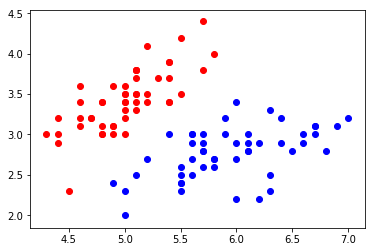

In [6]:
plt.scatter(X[y==0,0],X[y==0,1],color='r')
plt.scatter(X[y==1,0],X[y==1,1],color='b')
plt.show()

In [9]:
from sklearn.preprocessing import StandardScaler
s_s = StandardScaler()

In [10]:
s_s.fit(X)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [11]:
X_standard=s_s.transform(X)

In [13]:
X_standard.shape

(100, 2)

In [43]:
from sklearn.svm import LinearSVC
svc = LinearSVC(C=1e9)
svc.fit(X_standard, y)

LinearSVC(C=1000000000.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [15]:
svc.fit(X_standard,y)

SVC(C=1000000000.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [17]:
svc.score(X_standard,y)

1.0

In [39]:
from matplotlib.colors import ListedColormap

In [40]:
def plot_decision_boundary(model,axis):
    x0, x1 = np.meshgrid(
        np.linspace(axis[0],axis[1],int((axis[1] - axis[0]) * 100)).reshape(-1,1),
        np.linspace(axis[2],axis[3],int((axis[3] - axis[2]) * 100)).reshape(-1,1)
    )
    X_new = np.c_[x0.ravel(),x1.ravel()]
    y_predict = model.predict(X_new)
    zz = y_predict.reshape(x0.shape)
    
    custom_cmap = ListedColormap(['#EF9A9A','#FFF59D','#90CAF9'])
    plt.contourf(x0, x1, zz, linewidth=5, cmap=custom_cmap)
    

/A/develop/ide/anaconda3/lib/python3.7/site-packages/matplotlib/contour.py:1000: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


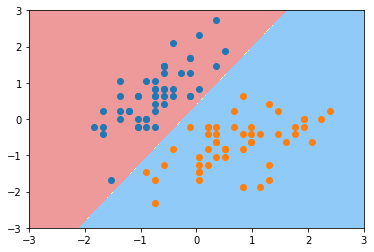

In [44]:
plot_decision_boundary(svc, axis=[-3, 3, -3, 3])
plt.scatter(X_standard[y==0,0], X_standard[y==0,1])
plt.scatter(X_standard[y==1,0], X_standard[y==1,1])
plt.show()

In [50]:
def plot_decisions(model,axis,plot_decision_boundary):
    plot_decision_boundary(model,axis)
    plt.scatter(X_standard[y==0,0], X_standard[y==0,1])
    plt.scatter(X_standard[y==1,0], X_standard[y==1,1])
    plt.show()

In [46]:
svc2 = LinearSVC(C=0.01)
svc2.fit(X_standard,y)

LinearSVC(C=0.01, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

/A/develop/ide/anaconda3/lib/python3.7/site-packages/matplotlib/contour.py:1000: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


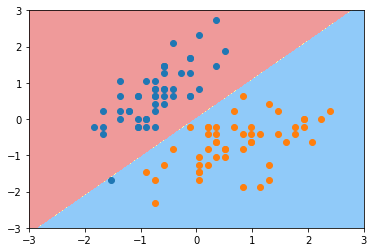

In [47]:
plot_decisions(svc2,[-3,3,-3,3])

In [48]:
svc.coef_

array([[ 4.0323752 , -2.50699213]])

In [49]:
svc.intercept_

array([0.92732431])

In [62]:
def plot_svc_decision_boundary(model, axis):
    
    x0, x1 = np.meshgrid(
        np.linspace(axis[0], axis[1], int((axis[1]-axis[0])*100)).reshape(-1, 1),
        np.linspace(axis[2], axis[3], int((axis[3]-axis[2])*100)).reshape(-1, 1),
    )
    X_new = np.c_[x0.ravel(), x1.ravel()]

    y_predict = model.predict(X_new)
    zz = y_predict.reshape(x0.shape)

    from matplotlib.colors import ListedColormap
    custom_cmap = ListedColormap(['#EF9A9A','#FFF59D','#90CAF9'])
    
    plt.contourf(x0, x1, zz, linewidth=5, cmap=custom_cmap)
    
    w = model.coef_[0]
    b = model.intercept_[0]
    
    # w0*x0 + w1*x1 + b = 0
    # => x1 = -w0/w1 * x0 - b/w1
    plot_x = np.linspace(axis[0], axis[1], 200)
    up_y = -w[0]/w[1] * plot_x - b/w[1] + 1/w[1]
    down_y = -w[0]/w[1] * plot_x - b/w[1] - 1/w[1]
    
    up_index = (up_y >= axis[2]) & (up_y <= axis[3])
    down_index = (down_y >= axis[2]) & (down_y <= axis[3])
    plt.plot(plot_x[up_index], up_y[up_index], color='black')
    plt.plot(plot_x[down_index], down_y[down_index], color='black')

/A/develop/ide/anaconda3/lib/python3.7/site-packages/matplotlib/contour.py:1000: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


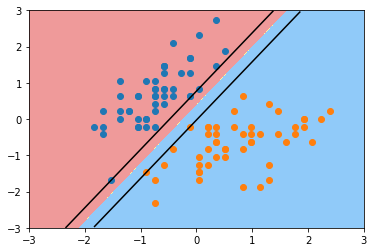

In [63]:
plot_decisions(svc,[-3,3,-3,3],plot_svc_decision_boundary)

/A/develop/ide/anaconda3/lib/python3.7/site-packages/matplotlib/contour.py:1000: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


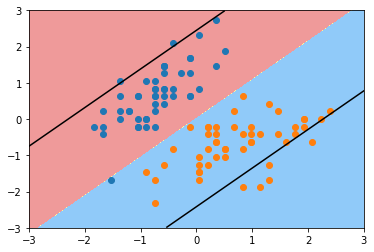

In [53]:
plot_decisions(svc2,[-3,3,-3,3],plot_svc_decision_boundary)